In [11]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import xarray as xr
import math

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler


In [12]:
# Create a set of hidden variables, z, which control the entire system. (If we could observe all of Z, we'd have R^2 = 1)
Nz = 50 # Number of hidden variables 
M = 1000 # Number of samples / data-points

Z = np.random.randn(M, Nz)

In [13]:
# Create the target of the prediction, y, which is a function of the Z variables, like Y = 0.1*z[0] + 0.2*z[1]...
cz = np.random.rand(Nz) # Random coefficient vector
y = Z.dot(cz)

In [14]:
# Create the observed variables (A subset of the hidden variables)
#FOR PCA purposes
Nx = 20
A = np.random.randn(Nz,Nx)
X = Z @ A

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


### First try without PCA

In [23]:
model0 = linear_model.LinearRegression(fit_intercept=True)
model0.fit(X_train, y_train)

# Compute R^2
y_pred_train =  model0.predict(X_train)
y_pred_test  =  model0.predict(X_test)
r2_train = (np.corrcoef(y_pred_train, y_train)[0,1])**2
r2_test  = (np.corrcoef(y_pred_test , y_test)[0,1])**2
print('Training R^2 is %.1f%%' % (r2_train*100))
print('Testing R^2 is %.1f%%'  % (r2_test*100))

Training R^2 is 54.8%
Testing R^2 is 52.7%


### Second, try with PCA

In [26]:
# (1) Trying using the entire dataset. This should theoretically give us the same R^2
pca = PCA(n_components = Nx)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca  = pca.transform(X_test)

model1 = linear_model.LinearRegression(fit_intercept=True)
model1.fit(X_train_pca, y_train)

# Compute R^2
y_pred_train =  model1.predict(X_train_pca)
y_pred_test  =  model1.predict(X_test_pca)
r2_train = (np.corrcoef(y_pred_train, y_train)[0,1])**2
r2_test  = (np.corrcoef(y_pred_test , y_test)[0,1])**2
print('Training R^2 is %.1f%%' % (r2_train*100))
print('Testing R^2 is %.1f%%'  % (r2_test*100))


Training R^2 is 54.8%
Testing R^2 is 52.7%


In [27]:
# (1) Same thing but only use half the n_components. Theoretically we should get more than half the % of using n=20 if PCA is working right
pca = PCA(n_components = 10)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca  = pca.transform(X_test)

model1 = linear_model.LinearRegression(fit_intercept=True)
model1.fit(X_train_pca, y_train)

# Compute R^2
y_pred_train =  model1.predict(X_train_pca)
y_pred_test  =  model1.predict(X_test_pca)
r2_train = (np.corrcoef(y_pred_train, y_train)[0,1])**2
r2_test  = (np.corrcoef(y_pred_test , y_test)[0,1])**2
print('Training R^2 is %.1f%%' % (r2_train*100))
print('Testing R^2 is %.1f%%'  % (r2_test*100))


Training R^2 is 35.3%
Testing R^2 is 36.4%


#### Pranathi's code, saved:

In [5]:


# #For r^2 of whole data (Theoretical and Actual)
# regr = linear_model.LinearRegression(fit_intercept=True)
# regr.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# #Should standardize to unit var/std dev and Center at mean  
# sc = StandardScaler()
# sc.fit(X_train)
# sc.fit(X_test)

# X_reduced_train = sc.transform(X_train)
# X_reduced_test = sc.transform(X_test)

pca = PCA(n_components = 8)

# X_train_pca = pca.fit_transform(X_reduced_train)
# X_test_pca = pca.fit_transform(X_reduced_test)

# model = linear_model.LinearRegression(fit_intercept=True)
# model.fit(X_train_pca, y_train)

LinearRegression()

<IPython.core.display.Javascript object>


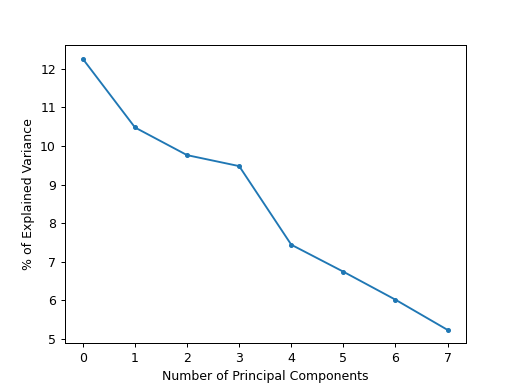

In [6]:
#PCA and Var
plt.figure()
plt.plot(pca.explained_variance_ratio_ *100,'.-')
plt.xlabel('Number of Principal Components')
plt.ylabel('% of Explained Variance')
plt.show()

In [7]:
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)
var

array([12.25, 22.73, 32.49, 41.97, 49.41, 56.15, 62.17, 67.41])

In [141]:
# Compute R^2 of entire dataset
y_pred = regr.predict(X)
r = np.corrcoef(y_pred, y)[0,1] # Take the off-diagonal element
r2 = r**2
print('Achieved R^2 is %.1f%%' % (r2*100))

# Since we know the underlying data we should be able to predict the best achievable R^2. 
# If I'm thinking about this right, it should be identical to the amount of "energy" in the coefficient array
# that we're actually observing.
r2_theory = sum(cz[:Nx]**2)/sum(cz**2)
print('Theoretical R^2 is %.1f%%' % (r2_theory*100))

Achieved R^2 is 59.2%
Theoretical R^2 is 37.9%


In [152]:
# R2 of Train

y_train_pred = model.predict(X_train_pca) #should this be with PCA or should it just be X_train?
r_train = np.corrcoef(y_train_pred, y_train)[0,1] # Take the off-diagonal element
r2_train = r_train**2
print('Achieved R^2 is %.1f%%' % (r2_train*100))


Achieved R^2 is 15.1%


In [153]:
# R2 of Test

y_test_pred = model.predict(X_test_pca)
r_test = np.corrcoef(y_test_pred, y_test)[0,1] # Take the off-diagonal element
r2_test = r_test**2
print('Achieved R^2 is %.1f%%' % (r2_test*100))


Achieved R^2 is 0.0%


In [154]:
#USING SKLEARN- This corresponds with the corrcoeff method for the Test, but not the train usually

from sklearn.metrics import r2_score
r2_train_sk = r2_score(y_train, y_train_pred)
r2_test_sk = r2_score(y_test, y_test_pred)

print('Achieved R^2 (Train) is %.1f%%' % (r2_train_sk*100))
print('Achieved R^2 (Test) is %.1f%%' % (r2_test_sk*100)) #still aggressively negative :/


Achieved R^2 (Train) is 15.1%
Achieved R^2 (Test) is -20.9%
